<a href="https://colab.research.google.com/github/juantijero/ML_HW/blob/main/HW3_Juan_Tijero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded and binary target created.
Data split and scaled.

Starting training for 100 epochs...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic

Training complete.


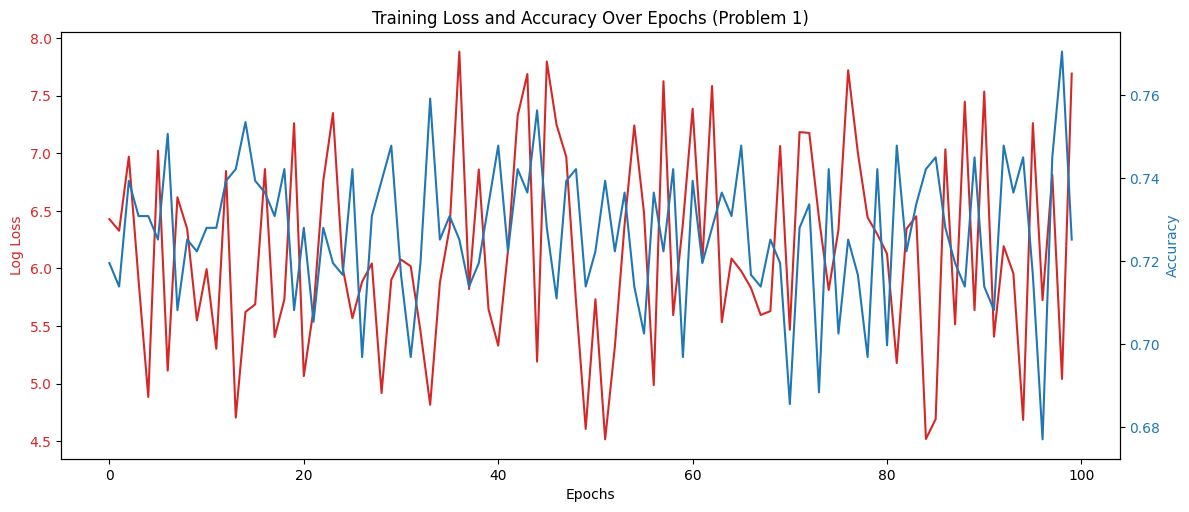


--- Final Model Evaluation on Test Data ---
              precision    recall  f1-score   support

    Negative       0.75      0.84      0.79        49
    Positive       0.76      0.65      0.70        40

    accuracy                           0.75        89
   macro avg       0.76      0.74      0.75        89
weighted avg       0.75      0.75      0.75        89

Confusion Matrix:


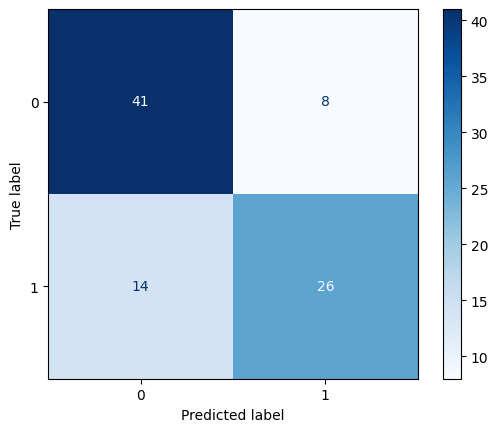

In [ ]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, ConfusionMatrixDisplay

# --- 2. Load and Prepare Data ---
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Create a binary target for classification (1 if above median, else 0)
df['binary_target'] = (df['target'] > np.median(diabetes.target)).astype(int)
X = df.drop(['target', 'binary_target'], axis=1)
y = df['binary_target']
print("Data loaded and binary target created.")

# --- 3. Split and Scale Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data split and scaled.")

# --- 4. Iterative Model Training ---
# Initialize the model for iterative training
model = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)

n_epochs = 100
train_losses = []
train_accuracies = []

print(f"\nStarting training for {n_epochs} epochs...")
for epoch in range(n_epochs):
    # Train for one epoch
    model.fit(X_train_scaled, y_train)

    # Calculate performance on the TRAINING data
    y_train_pred_proba = model.predict_proba(X_train_scaled)
    loss = log_loss(y_train, y_train_pred_proba)
    accuracy = model.score(X_train_scaled, y_train)

    # Store the results
    train_losses.append(loss)
    train_accuracies.append(accuracy)

print("Training complete.")

# --- 5. Plot Training Results Over Iterations ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Loss
color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Log Loss', color=color)
ax1.plot(train_losses, color=color, label='Training Loss')
ax1.tick_params(axis='y', labelcolor=color)

# Plot Accuracy on a second y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(train_accuracies, color=color, label='Training Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Training Loss and Accuracy Over Epochs (Problem 1)')
plt.show()

# --- 6. Final Evaluation on Test Data ---
print("\n--- Final Model Evaluation on Test Data ---")
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.show()

Cancer data loaded.
Data split and scaled.

Starting training for 100 epochs (Part 2a)...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic

Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


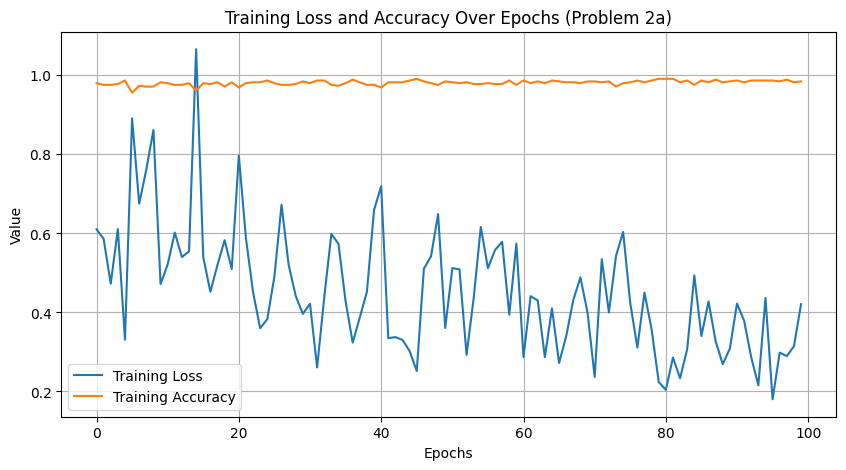


--- Final Evaluation (Part 2a) ---
              precision    recall  f1-score   support

   Malignant       0.91      0.98      0.94        43
      Benign       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix (Part 2a):


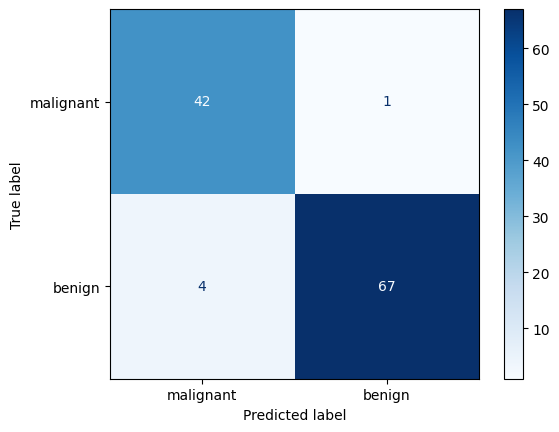

In [ ]:
# --- 1. Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, ConfusionMatrixDisplay

# --- 2. Load and Prepare Data ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print("Cancer data loaded.")

# --- 3. Split and Scale Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data split and scaled.")

# --- 4. Iterative Model Training (Part a) ---
model_a = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42, penalty=None)

n_epochs = 100
train_losses_a = []
train_accuracies_a = []

print(f"\nStarting training for {n_epochs} epochs (Part 2a)...")
for epoch in range(n_epochs):
    model_a.fit(X_train_scaled, y_train)
    y_train_pred_proba = model_a.predict_proba(X_train_scaled)
    loss = log_loss(y_train, y_train_pred_proba)
    accuracy = model_a.score(X_train_scaled, y_train)
    train_losses_a.append(loss)
    train_accuracies_a.append(accuracy)
print("Training complete.")

# --- 5. Plot Training Results (Part a) ---
plt.figure(figsize=(10, 5))
plt.plot(train_losses_a, label='Training Loss')
plt.plot(train_accuracies_a, label='Training Accuracy')
plt.title('Training Loss and Accuracy Over Epochs (Problem 2a)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# --- 6. Final Evaluation on Test Data (Part a) ---
print("\n--- Final Evaluation (Part 2a) ---")
y_pred_a = model_a.predict(X_test_scaled)
print(classification_report(y_test, y_pred_a, target_names=['Malignant', 'Benign']))

print("Confusion Matrix (Part 2a):")
ConfusionMatrixDisplay.from_estimator(model_a, X_test_scaled, y_test, cmap=plt.cm.Blues, display_labels=cancer.target_names)
plt.show()


Starting training for 100 epochs with L2 penalty (Part 2b)...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic

Training complete.

--- Final Evaluation with L2 Penalty (Part 2b) ---
              precision    recall  f1-score   support

   Malignant       0.95      0.98      0.97        43
      Benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix with L2 Penalty (Part 2b):


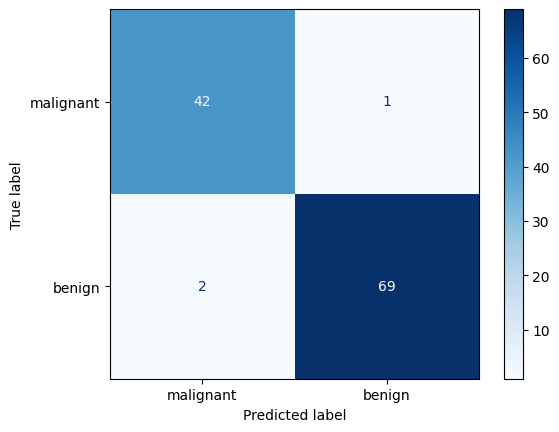

In [ ]:
# --- 7. Iterative Training with Weight Penalty (Part b) ---
# NOTE: The only change is adding penalty='l2' (which is the default, but we state it explicitly)
model_b = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42, penalty='l2')

train_losses_b = []
train_accuracies_b = []

print(f"\nStarting training for {n_epochs} epochs with L2 penalty (Part 2b)...")
for epoch in range(n_epochs):
    model_b.fit(X_train_scaled, y_train)
    y_train_pred_proba = model_b.predict_proba(X_train_scaled)
    loss = log_loss(y_train, y_train_pred_proba)
    accuracy = model_b.score(X_train_scaled, y_train)
    train_losses_b.append(loss)
    train_accuracies_b.append(accuracy)
print("Training complete.")

# --- 8. Final Evaluation on Test Data (Part b) ---
print("\n--- Final Evaluation with L2 Penalty (Part 2b) ---")
y_pred_b = model_b.predict(X_test_scaled)
print(classification_report(y_test, y_pred_b, target_names=['Malignant', 'Benign']))

print("Confusion Matrix with L2 Penalty (Part 2b):")
ConfusionMatrixDisplay.from_estimator(model_b, X_test_scaled, y_test, cmap=plt.cm.Blues, display_labels=cancer.target_names)
plt.show()